In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 


In [5]:
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size" 
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size'

In [3]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen          39.10000         18.70000         181.000000   
1  Adelie  Torgersen          39.50000         17.40000         186.000000   
2  Adelie  Torgersen          40.30000         18.00000         195.000000   
3  Adelie  Torgersen          43.92193         17.15117         200.915205   
4  Adelie  Torgersen          36.70000         19.30000         193.000000   

   body_mass_g     sex  
0  3750.000000    MALE  
1  3800.000000  FEMALE  
2  3250.000000  FEMALE  
3  4201.754386    MALE  
4  3450.000000  FEMALE  


In [4]:
data['sex'] = data['sex'].replace('.', np.nan)


In [5]:
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())


Missing Values Before Cleaning:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  1
dtype: int64


In [6]:
data_cleaned = data.dropna()

In [7]:
print("\nSummary Statistics:")
print(data_cleaned.describe())


Summary Statistics:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        343.000000       343.000000         343.000000   343.000000
mean          43.920244        17.155400         200.868310  4199.791571
std            5.451506         1.970337          14.014098   799.950869
min           32.100000        13.100000         172.000000  2700.000000
25%           39.250000        15.600000         190.000000  3550.000000
50%           44.100000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [8]:
sns.set(style="whitegrid")


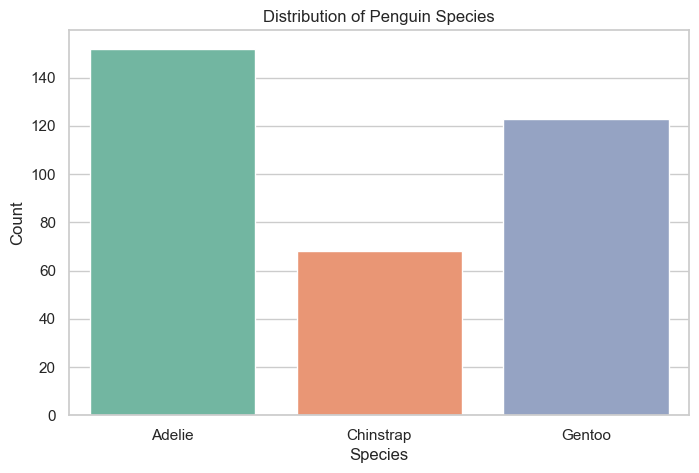

In [9]:
# 1. Bar plot: Distribution of species
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='species', palette='Set2', hue='species', dodge=False, legend=False)
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

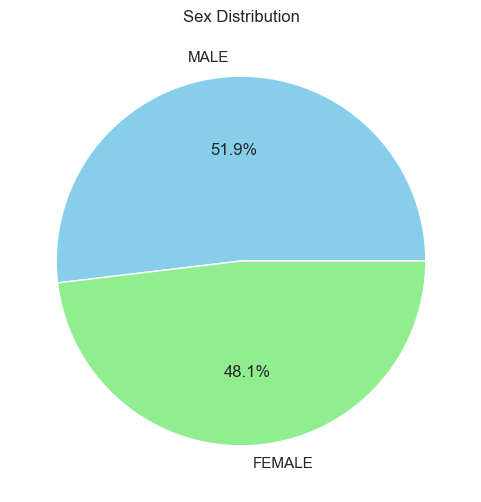

In [10]:
# 2. Pie chart: Sex distribution
plt.figure(figsize=(6, 6))
data_cleaned['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Sex Distribution')
plt.ylabel('')
plt.show()

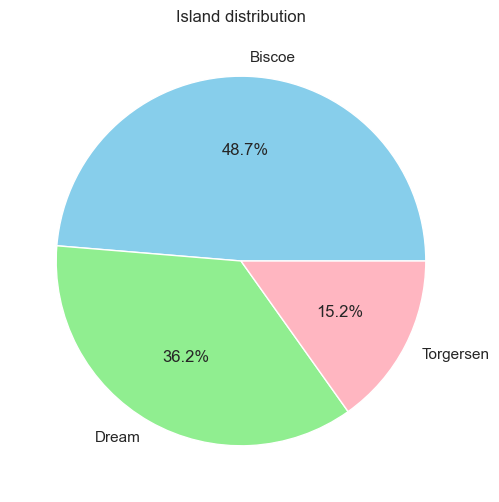

In [11]:
# 3. Pie chart: Island distribution
plt.figure(figsize=(6, 6))
data_cleaned['island'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightpink'])
plt.title('Island distribution')
plt.ylabel('')
plt.show()

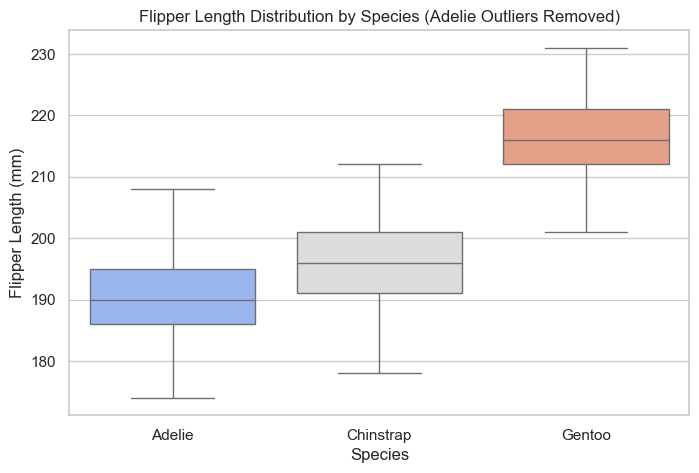

In [12]:
# 4. Box plot: Flipper length by species


# Separate Adelie species for outlier removal
adelie_data = data_cleaned[data_cleaned['species'] == 'Adelie']

# Calculate IQR for Adelie species only
Q1 = adelie_data['flipper_length_mm'].quantile(0.25)
Q3 = adelie_data['flipper_length_mm'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers in Adelie only
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from Adelie species only
adelie_filtered = adelie_data[(adelie_data['flipper_length_mm'] >= lower_bound) & 
                              (adelie_data['flipper_length_mm'] <= upper_bound)]


non_adelie_data = data_cleaned[data_cleaned['species'] != 'Adelie']

# Combine Adelie (outliers removed) with the rest of the dataset
data_filtered = pd.concat([adelie_filtered, non_adelie_data])

plt.figure(figsize=(8, 5))
sns.boxplot(data=data_filtered, x='species', y='flipper_length_mm', hue='species', dodge=False, palette='coolwarm')
plt.title('Flipper Length Distribution by Species (Adelie Outliers Removed)')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

plt.show()

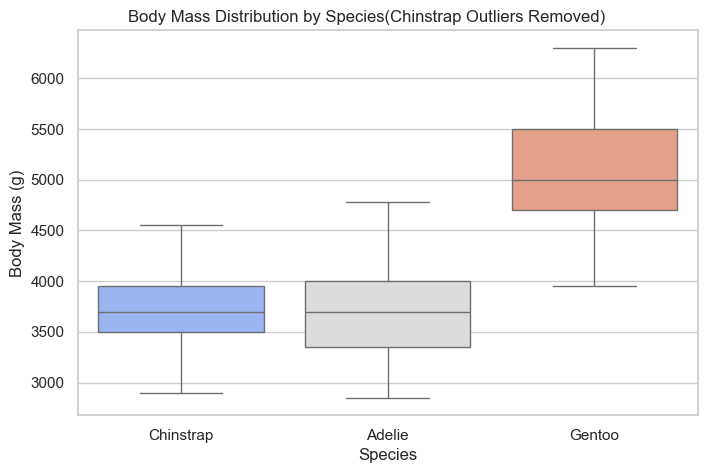

In [13]:
# 5. Box plot: Body Mass by species


# Separate Chinstrap species for outlier removal
chinstrap_data = data_cleaned[data_cleaned['species'] == 'Chinstrap']

# Calculate IQR for Chinstrap species only
Q1 = chinstrap_data['body_mass_g'].quantile(0.25)
Q3 = chinstrap_data['body_mass_g'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers in Chinstrap only
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from Chinstrap species only
chinstrap_filtered = chinstrap_data[(chinstrap_data['body_mass_g'] >= lower_bound) & 
                                    (chinstrap_data['body_mass_g'] <= upper_bound)]

non_chinstrap_data = data_cleaned[data_cleaned['species'] != 'Chinstrap']

data_filtered = pd.concat([chinstrap_filtered, non_chinstrap_data])


plt.figure(figsize=(8, 5))
sns.boxplot(data=data_filtered, x='species', y='body_mass_g', hue='species', dodge=False, palette='coolwarm')
plt.title('Body Mass Distribution by Species(Chinstrap Outliers Removed)         ')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')

plt.show()


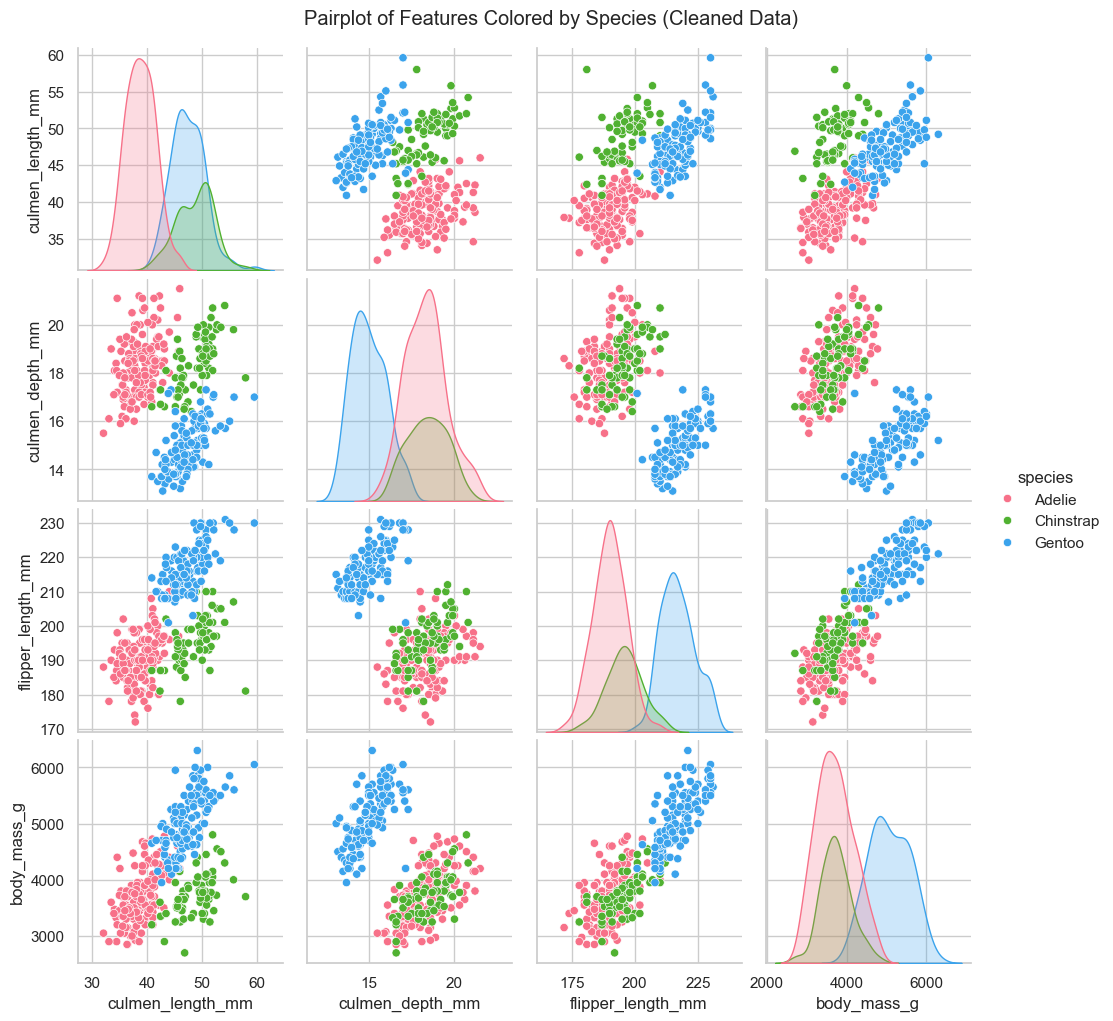

In [14]:
# 6. Pairplot: Relationships among numerical features by species
sns.pairplot(data_cleaned, hue='species', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features Colored by Species (Cleaned Data)', y=1.02)
plt.show()

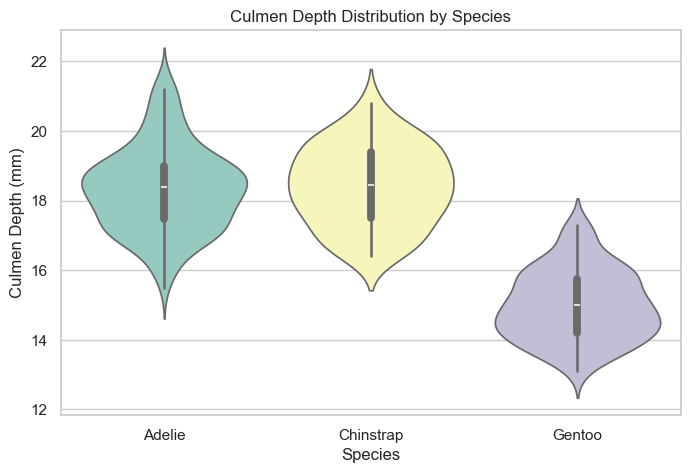

In [15]:
# 7. Violin plot: Culmen depth by species
plt.figure(figsize=(8, 5))
sns.violinplot(data=data_cleaned, x='species', y='culmen_depth_mm', inner='box', hue='species', dodge=False, palette='Set3', legend=False)
plt.title('Culmen Depth Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Culmen Depth (mm)')
plt.show()

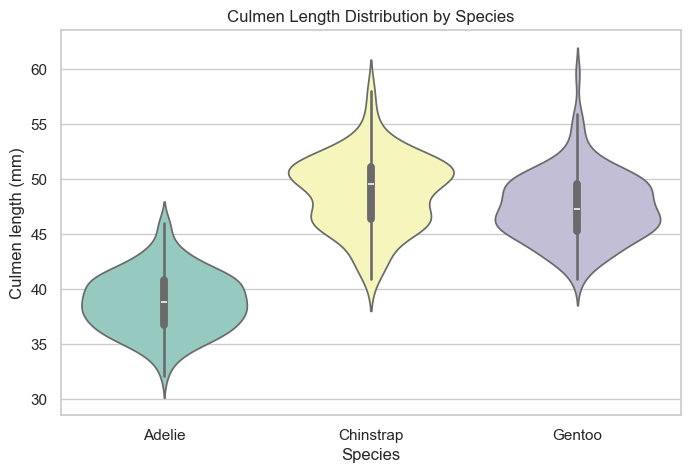

In [33]:
# 8. Violin plot: Culmen length by species
plt.figure(figsize=(8, 5))
sns.violinplot(data=data_cleaned, x='species', y='culmen_length_mm', inner='box', hue='species', dodge=False, palette='Set3', legend=False)
plt.title('Culmen Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Culmen length (mm)')

plt.show()

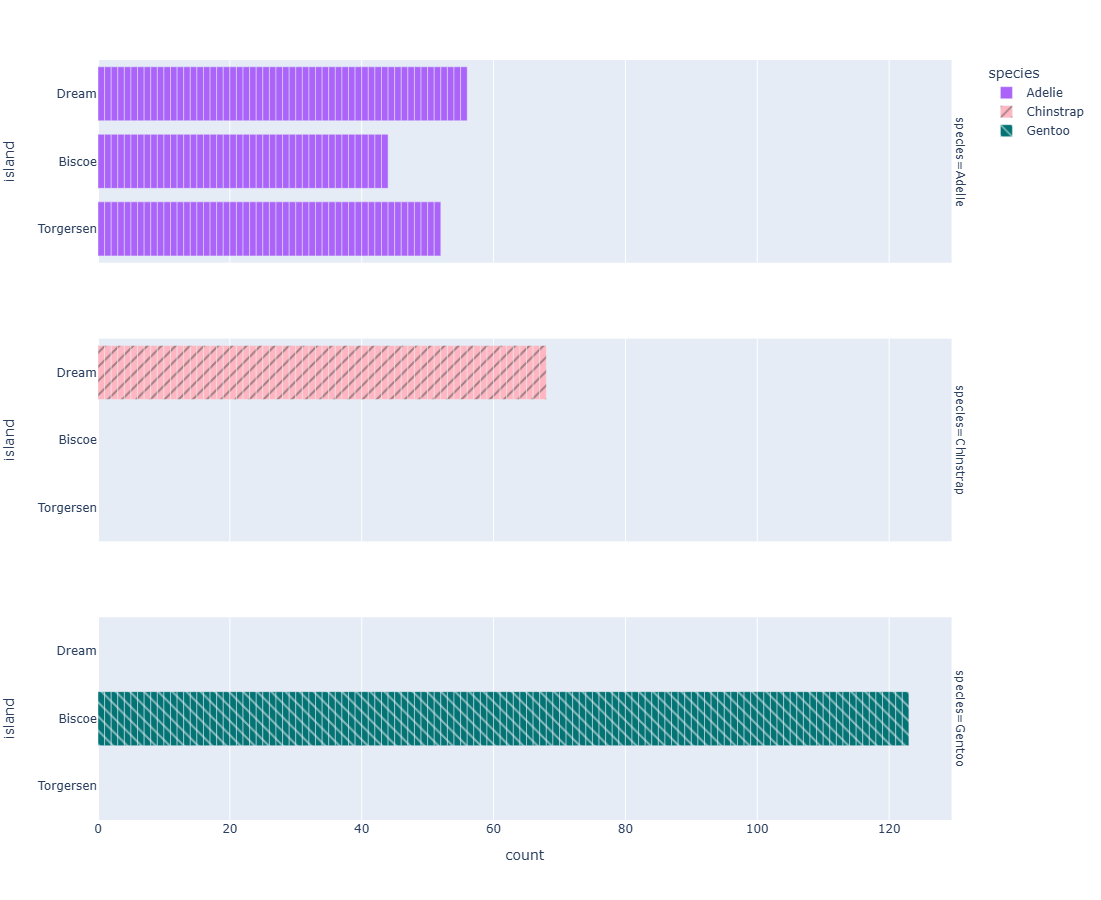

In [20]:
# 9. Bar Graph: island by species 
px.bar( data_frame=data_cleaned, y = 'island', 
facet_row='species',facet_row_spacing=0.10, 
pattern_shape='species',
color='species', 
color_discrete_map={'Adeile':'purple', 'Chinstrap':'lightpink', 'Gentoo':'rgb(4,115,116)'},
width=1200,height=900 )

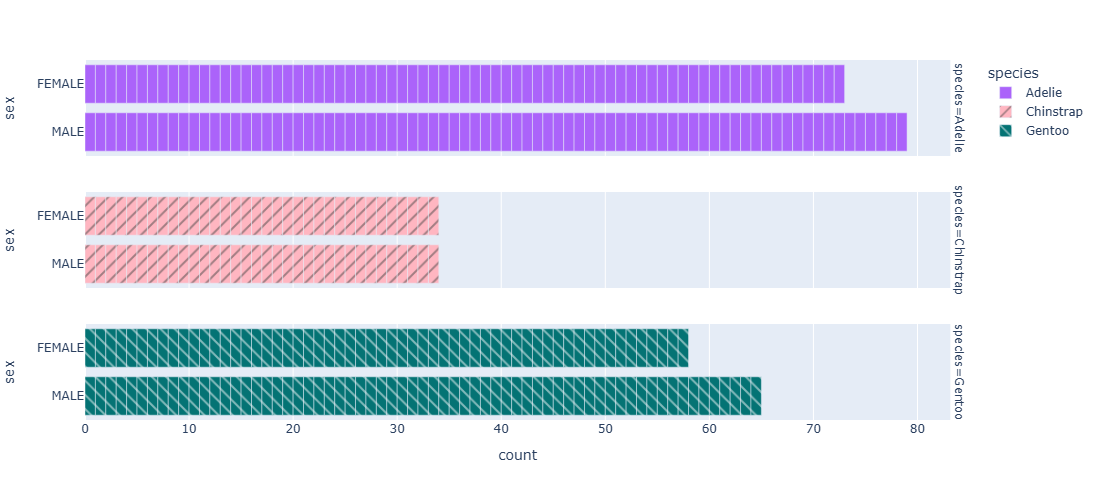

In [62]:
# 10. Bar Graph: gender by species
fig =px.bar(data_frame=data_cleaned, y = 'sex',

facet_row='species',facet_row_spacing=0.10,

pattern_shape='species',

color='species',

color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'lightpink', 'Gentoo':'rgb(4,115,116)'},

width=1200,height=500 )

fig.show()

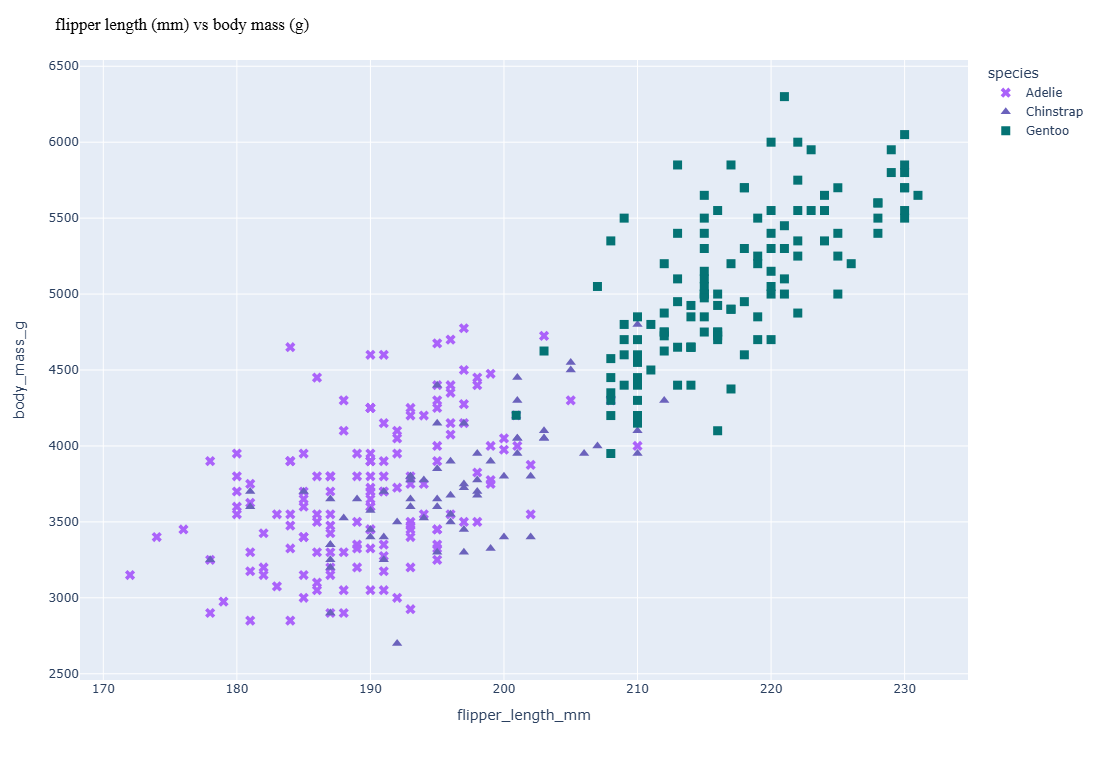

In [50]:
# 11. Scatter plot: Flipper length(mm) vs Body Mass(g)
fig = px.scatter(data_frame=data_cleaned, 
x = 'flipper_length_mm', y = 'body_mass_g',
color = 'species', 
color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(107,98,188)', 'Gentoo':'rgb(4,115,116)'},
symbol='species',
symbol_map = {'Adeile': 'cross', 'Chinstrap':'triangle-up', 'Gentoo':'square'},
height= 760
 )
fig.update_traces(marker=dict(size=9))
fig.update_layout(title='flipper length (mm) vs body mass (g)',
                  titlefont = dict( color='black', family='Open Sans',),) 
                  
fig.show()

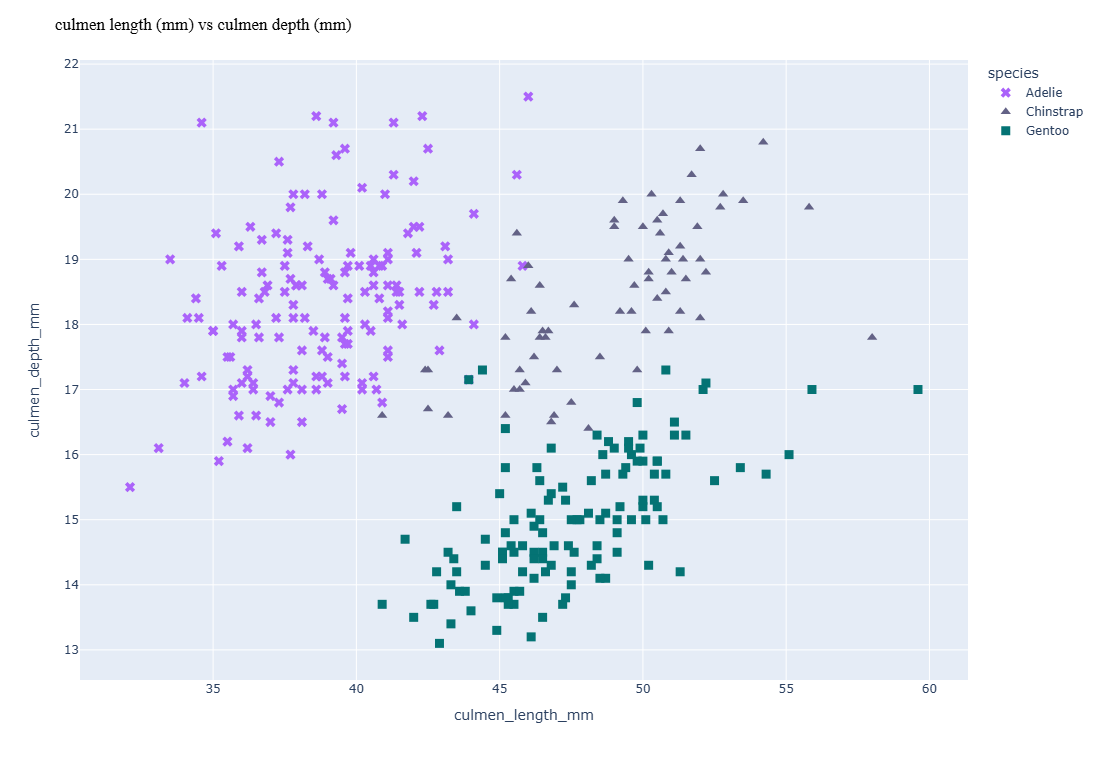

In [64]:
# 11. Scatter plot: culmen length (mm) vs culmen depth (mm)
fig = px.scatter(data_frame=data_cleaned, 
x = 'culmen_length_mm', y = 'culmen_depth_mm',
color = 'species', 
color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(99,98,134)', 'Gentoo':'rgb(4,115,116)'},
symbol='species',
symbol_map = {'Adeile': 'cross', 'Chinstrap':'triangle-up', 'Gentoo':'square'},
height= 760
           )
fig.update_traces(marker=dict(size=9))
fig.update_layout(title='culmen length (mm) vs culmen depth (mm)',
                  titlefont = dict(color='black', family='Open Sans',), )
                  
fig.show()

In [71]:
# Save cleaned dataset to a new file
data_cleaned.to_csv("cleaned_penguins_size_processed.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_penguins_size_processed.csv'.")


Cleaned dataset saved as 'cleaned_penguins_size_processed.csv'.


In [72]:
import os
print(os.getcwd())

C:\Users\DELL


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

# Load dataset
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size_processed.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%, Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=1):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


RandomForest - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for RandomForest:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

GradientBoosting - Accuracy: 97.10%, Precision: 0.9716, Recall: 0.9710, F1 Score: 0.9709
Confusion Matrix for GradientBoosting:
[[34  0  1]
 [ 1 11  0]
 [ 0  0 22]]

LogisticRegression - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for LogisticRegression:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

SVC - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for SVC:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

KNN - Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Confusion Matrix for KNN:
[[35  0  0]
 [ 0 12  0]
 [ 0  0 22]]

NaiveBayes - Accuracy: 82.61%, Precision: 0.8944, Recall: 0.8261, F1 Score: 0.8300
Confusion Matrix for NaiveBayes:
[[23 10  2]
 [ 0 12  0]
 [ 0  0 22]]

DecisionTree - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load dataset
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size_processed.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%, Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=1):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


RandomForest - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for RandomForest:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

GradientBoosting - Accuracy: 97.10%, Precision: 0.9716, Recall: 0.9710, F1 Score: 0.9709
Confusion Matrix for GradientBoosting:
[[34  0  1]
 [ 1 11  0]
 [ 0  0 22]]

HistGradientBoosting - Accuracy: 95.65%, Precision: 0.9580, Recall: 0.9565, F1 Score: 0.9557
Confusion Matrix for HistGradientBoosting:
[[34  0  1]
 [ 2 10  0]
 [ 0  0 22]]



C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for XGBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 6
[LightGBM] [Info] Start training from score -0.850954
[LightGBM] [Info] Start training from score -1.587776
[LightGBM] [Info] Start training from score -0.998008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [2]:
!pip install xgboost lightgbm catboost


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load dataset
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size_processed.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # Removed use_label_encoder=False
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%, Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=1):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


RandomForest - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for RandomForest:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

GradientBoosting - Accuracy: 97.10%, Precision: 0.9716, Recall: 0.9710, F1 Score: 0.9709
Confusion Matrix for GradientBoosting:
[[34  0  1]
 [ 1 11  0]
 [ 0  0 22]]

HistGradientBoosting - Accuracy: 95.65%, Precision: 0.9580, Recall: 0.9565, F1 Score: 0.9557
Confusion Matrix for HistGradientBoosting:
[[34  0  1]
 [ 2 10  0]
 [ 0  0 22]]

XGBoost - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for XGBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 6
[LightGBM] [Info] Start training from score -0.850954
[LightGBM] [Inf

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load dataset
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size_processed.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # Removed use_label_encoder=False
    "LightGBM": LGBMClassifier(min_child_samples=10, min_split_gain=0.01, max_depth=10, verbose=-1),  # Adjusted for better splits
    "CatBoost": CatBoostClassifier(verbose=0),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%, Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=1)* 100:.2f}%, Recall: {recall_score(y_test, y_pred, average='weighted') * 100:.2f}%, F1 Score: {f1_score(y_test, y_pred, average='weighted')* 100:.2f}%")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


RandomForest - Accuracy: 97.10%, Precision: 97.26%, Recall: 97.10%, F1 Score: 97.01%
Confusion Matrix for RandomForest:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

GradientBoosting - Accuracy: 97.10%, Precision: 97.16%, Recall: 97.10%, F1 Score: 97.09%
Confusion Matrix for GradientBoosting:
[[34  0  1]
 [ 1 11  0]
 [ 0  0 22]]

HistGradientBoosting - Accuracy: 95.65%, Precision: 95.80%, Recall: 95.65%, F1 Score: 95.57%
Confusion Matrix for HistGradientBoosting:
[[34  0  1]
 [ 2 10  0]
 [ 0  0 22]]

XGBoost - Accuracy: 95.65%, Precision: 95.60%, Recall: 95.65%, F1 Score: 95.59%
Confusion Matrix for XGBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

LightGBM - Accuracy: 97.10%, Precision: 97.26%, Recall: 97.10%, F1 Score: 97.01%
Confusion Matrix for LightGBM:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

CatBoost - Accuracy: 95.65%, Precision: 95.60%, Recall: 95.65%, F1 Score: 95.59%
Confusion Matrix for CatBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

LogisticRegression - Accuracy: 97.10%, Precision: 97.2

Client 1 Accuracy: 92.75%
Client 2 Accuracy: 95.65%
Drift Detected!
Model requires retraining due to drift after client 2.
Client 3 Accuracy: 92.75%
Drift Detected!
Model requires retraining due to drift after client 3.
Client 4 Accuracy: 92.75%
Model requires retraining due to drift after client 4.
Client 5 Accuracy: 95.65%
Drift Detected!
Model requires retraining due to drift after client 5.


RandomForest - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for RandomForest:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

GradientBoosting - Accuracy: 97.10%, Precision: 0.9716, Recall: 0.9710, F1 Score: 0.9709
Confusion Matrix for GradientBoosting:
[[34  0  1]
 [ 1 11  0]
 [ 0  0 22]]

HistGradientBoosting - Accuracy: 95.65%, Precision: 0.9580, Recall: 0.9565, F1 Score: 0.9557
Confusion Matrix for HistGradientBoosting:
[[34  0  1]
 [ 2 10  0]
 [ 0  0 22]]

XGBoost - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for XGBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

LightGBM - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for LightGBM:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]

CatBoost - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for CatBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]

LogisticRegression - Accuracy: 97.10%, Precision: 0.97

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\1070659440.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=accuracy_scores, palette='viridis')


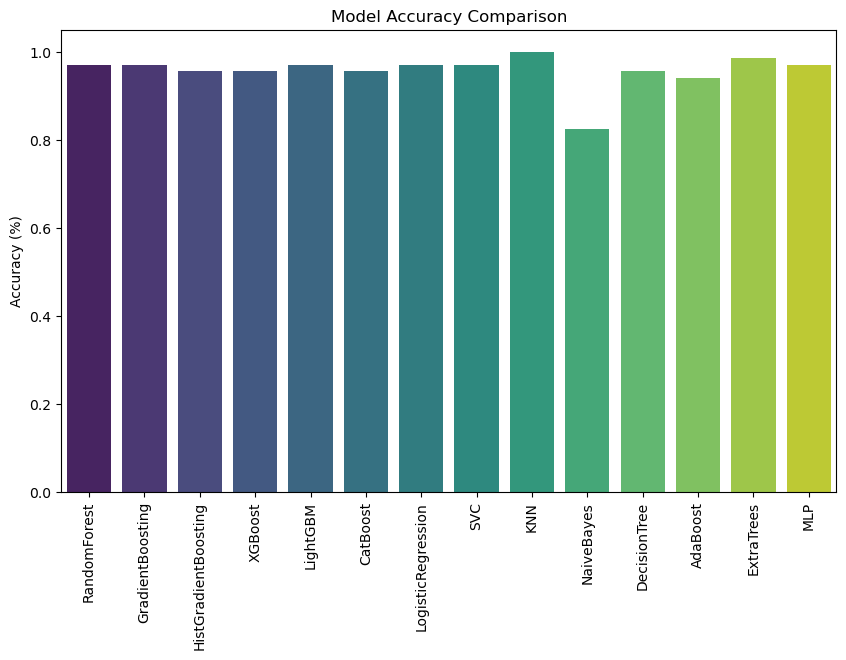

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\1070659440.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=precision_scores, palette='viridis')


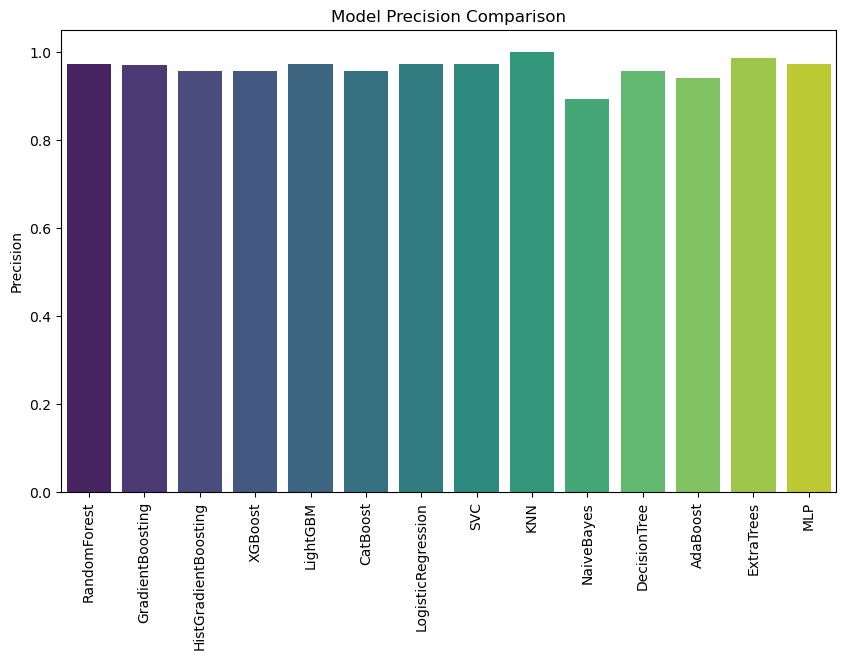

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\1070659440.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=recall_scores, palette='viridis')


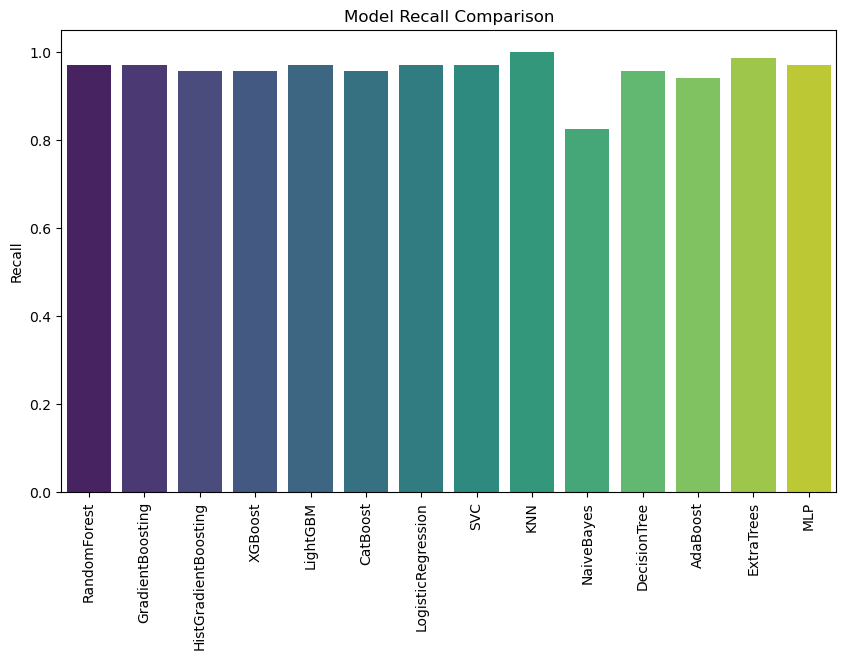

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\1070659440.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=f1_scores, palette='viridis')


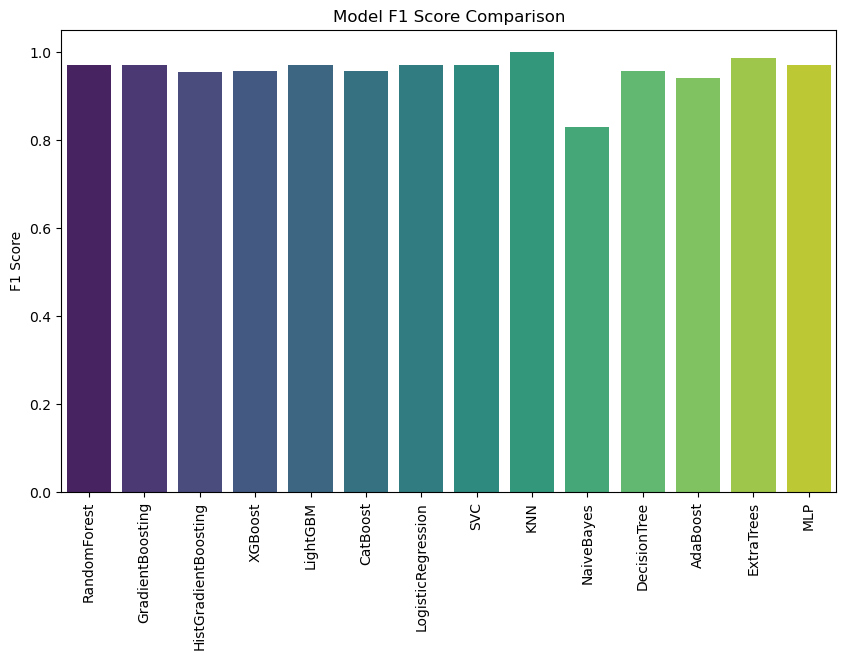

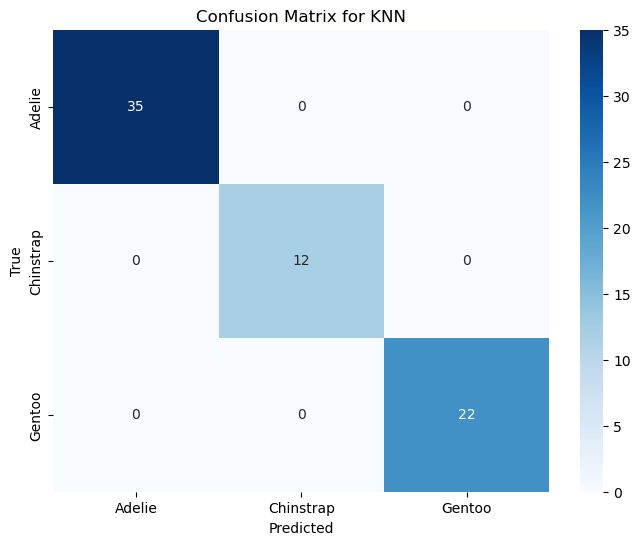

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load dataset
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size_processed.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # Removed use_label_encoder=False
    "LightGBM": LGBMClassifier(min_child_samples=10, min_split_gain=0.01, max_depth=10, verbose=-1),  # Adjusted for better splits
    "CatBoost": CatBoostClassifier(verbose=0),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Metrics storage
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store metrics for plotting
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    
    print(f"{name} - Accuracy: {accuracy * 100:.2f}%, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")

# Plotting the metrics

# Accuracy Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracy_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)
plt.show()

# Precision Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=precision_scores, palette='viridis')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.show()

# Recall Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=recall_scores, palette='viridis')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.show()

# F1 Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=f1_scores, palette='viridis')
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=90)
plt.show()

# Confusion Matrix Plot for the best model (based on accuracy)
best_model_index = np.argmax(accuracy_scores)
best_model_name = list(models.keys())[best_model_index]
best_conf_matrix = confusion_matrices[best_model_index]

plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['species'].classes_, yticklabels=label_encoders['species'].classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


RandomForest - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for RandomForest:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]



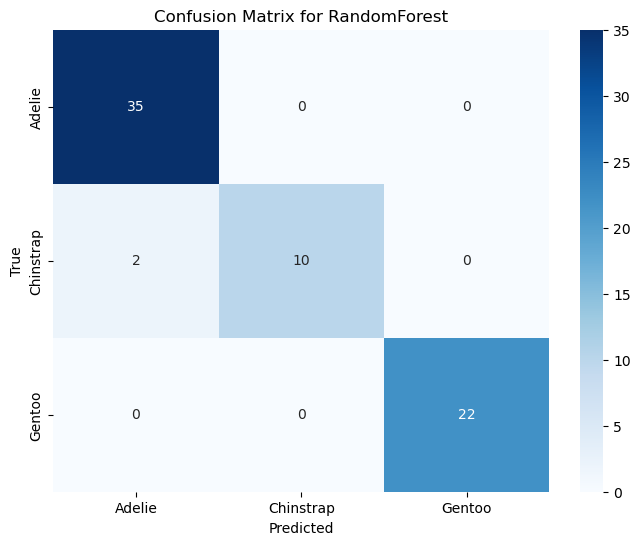

GradientBoosting - Accuracy: 97.10%, Precision: 0.9716, Recall: 0.9710, F1 Score: 0.9709
Confusion Matrix for GradientBoosting:
[[34  0  1]
 [ 1 11  0]
 [ 0  0 22]]



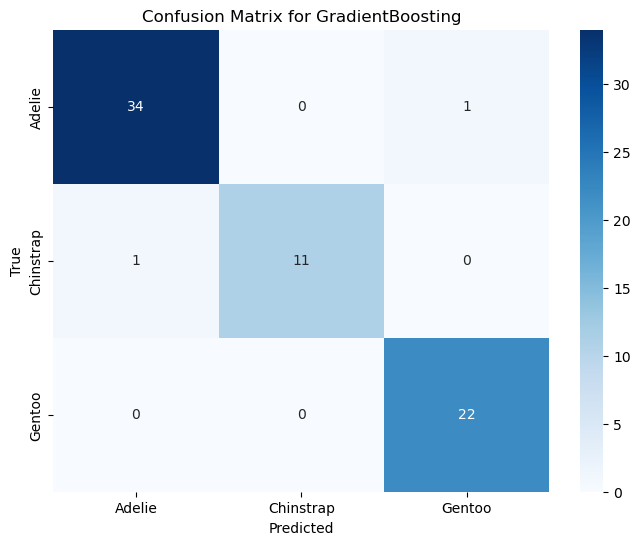

HistGradientBoosting - Accuracy: 95.65%, Precision: 0.9580, Recall: 0.9565, F1 Score: 0.9557
Confusion Matrix for HistGradientBoosting:
[[34  0  1]
 [ 2 10  0]
 [ 0  0 22]]



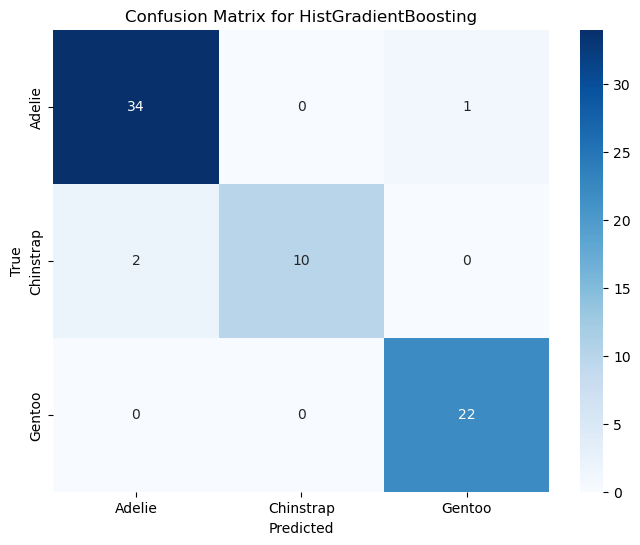

XGBoost - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for XGBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]



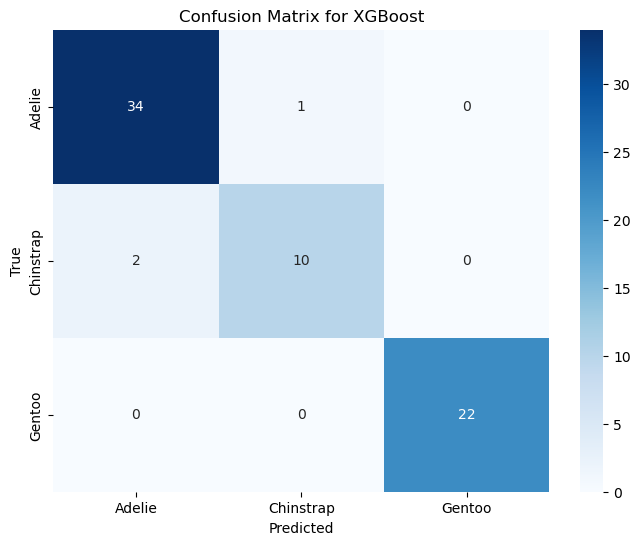

LightGBM - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for LightGBM:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]



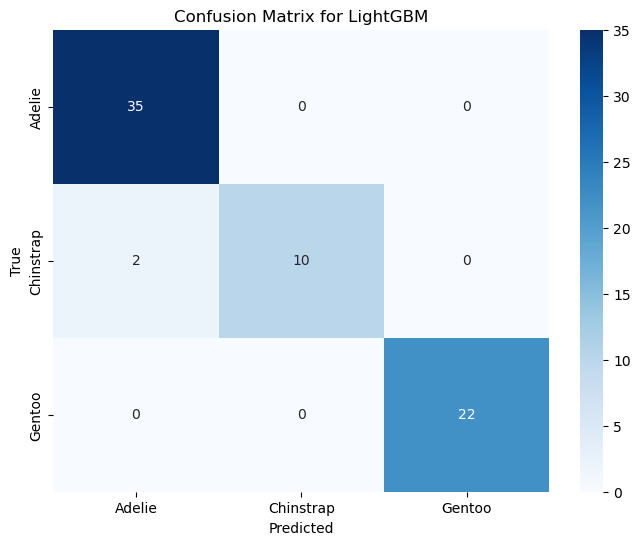

CatBoost - Accuracy: 95.65%, Precision: 0.9560, Recall: 0.9565, F1 Score: 0.9559
Confusion Matrix for CatBoost:
[[34  1  0]
 [ 2 10  0]
 [ 0  0 22]]



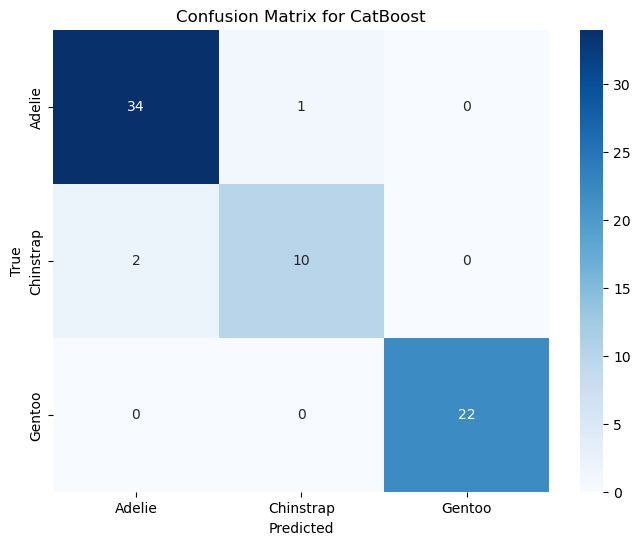

LogisticRegression - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for LogisticRegression:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]



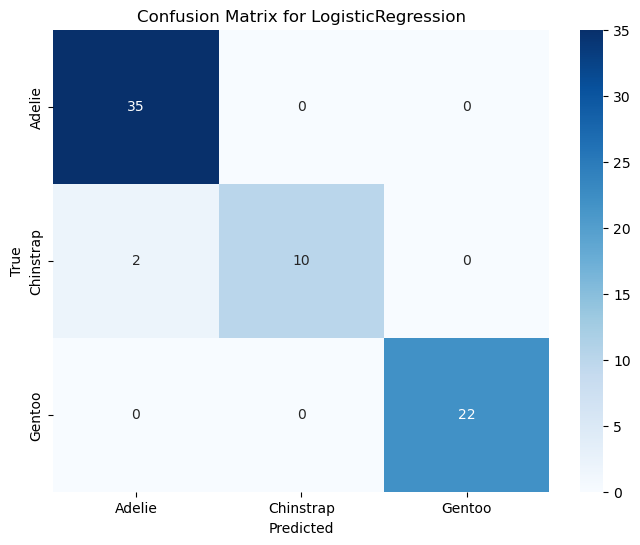

SVC - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for SVC:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]



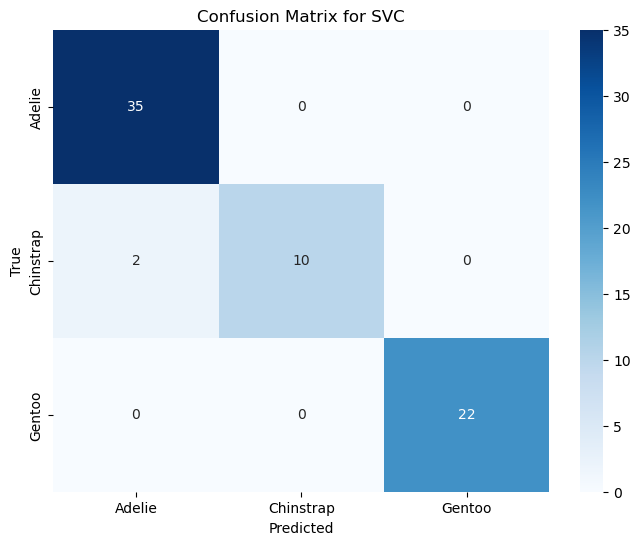

KNN - Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Confusion Matrix for KNN:
[[35  0  0]
 [ 0 12  0]
 [ 0  0 22]]



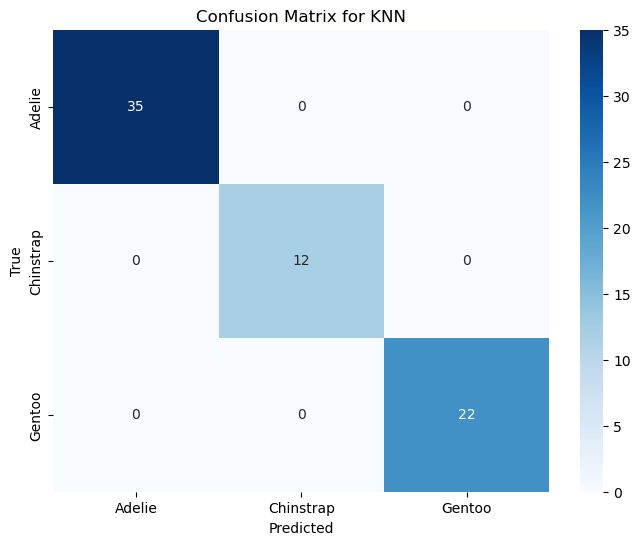

NaiveBayes - Accuracy: 82.61%, Precision: 0.8944, Recall: 0.8261, F1 Score: 0.8300
Confusion Matrix for NaiveBayes:
[[23 10  2]
 [ 0 12  0]
 [ 0  0 22]]



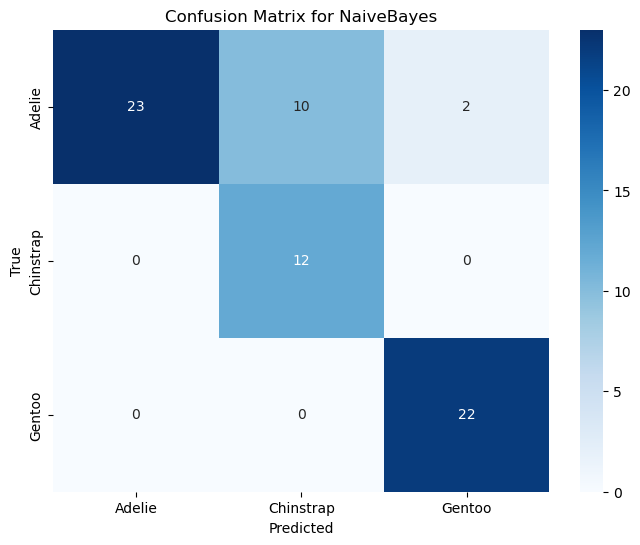

DecisionTree - Accuracy: 94.20%, Precision: 0.9413, Recall: 0.9420, F1 Score: 0.9412
Confusion Matrix for DecisionTree:
[[33  1  1]
 [ 2 10  0]
 [ 0  0 22]]



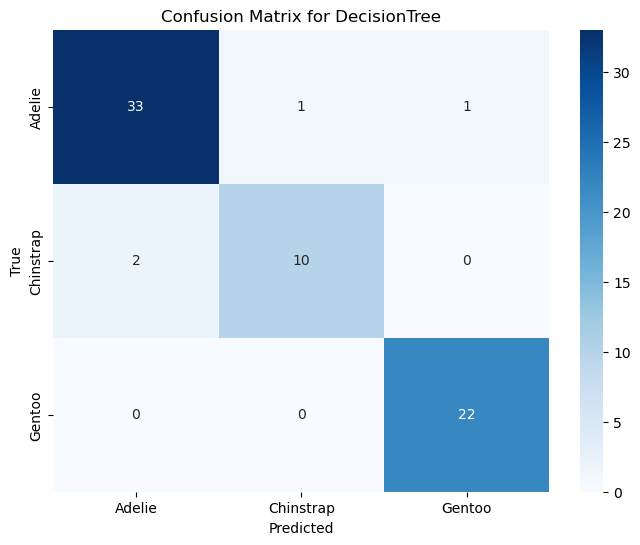

AdaBoost - Accuracy: 94.20%, Precision: 0.9420, Recall: 0.9420, F1 Score: 0.9420
Confusion Matrix for AdaBoost:
[[33  2  0]
 [ 2 10  0]
 [ 0  0 22]]



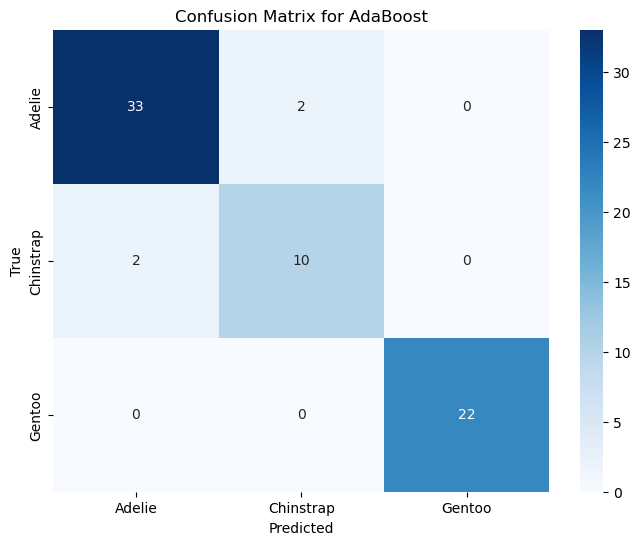

ExtraTrees - Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Confusion Matrix for ExtraTrees:
[[35  0  0]
 [ 0 12  0]
 [ 0  0 22]]



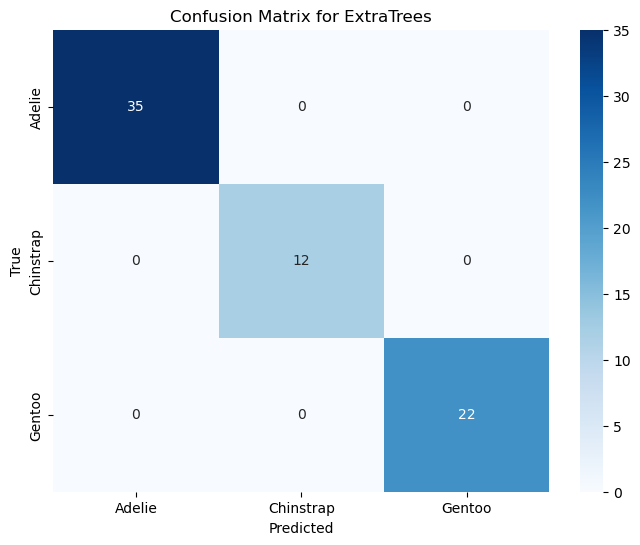

MLP - Accuracy: 97.10%, Precision: 0.9726, Recall: 0.9710, F1 Score: 0.9701
Confusion Matrix for MLP:
[[35  0  0]
 [ 2 10  0]
 [ 0  0 22]]



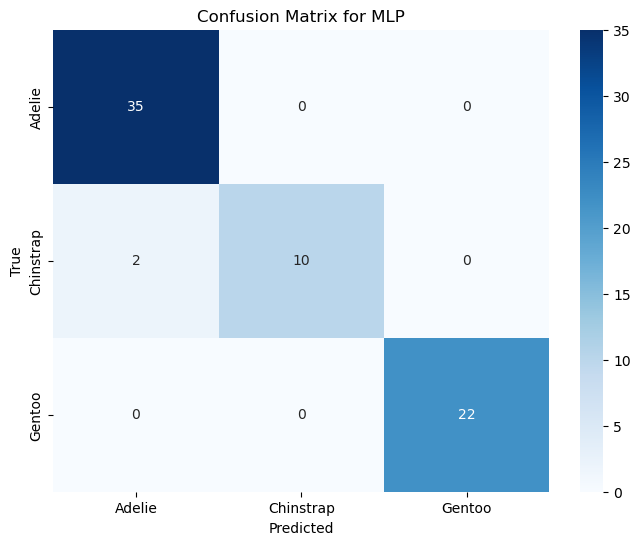

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\834743592.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=accuracy_scores, palette='viridis')


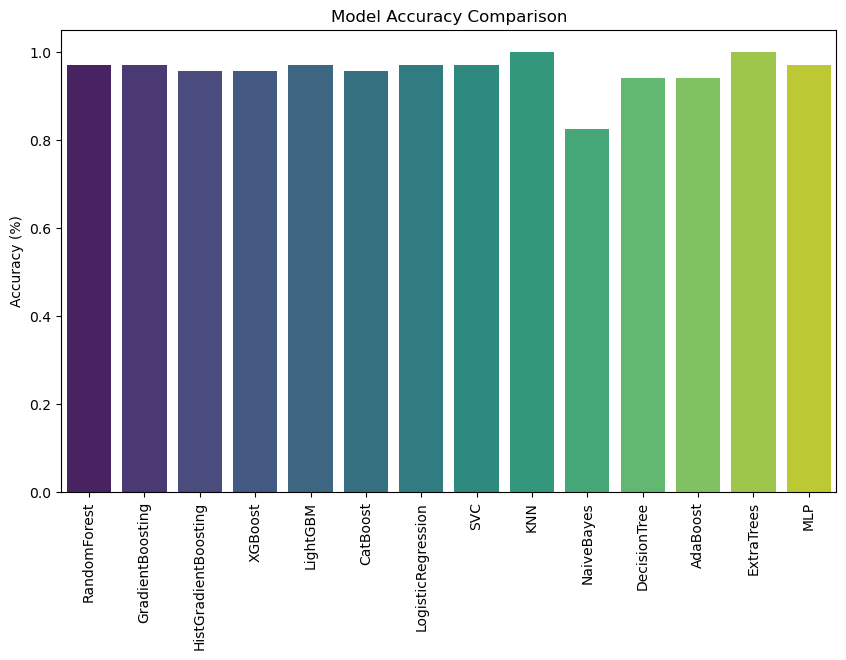

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\834743592.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=precision_scores, palette='viridis')


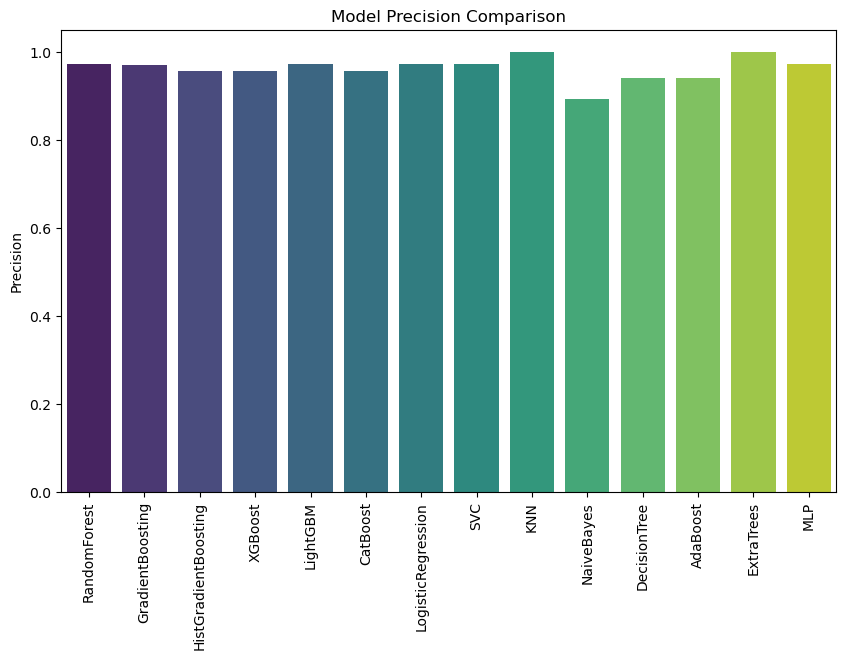

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\834743592.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=recall_scores, palette='viridis')


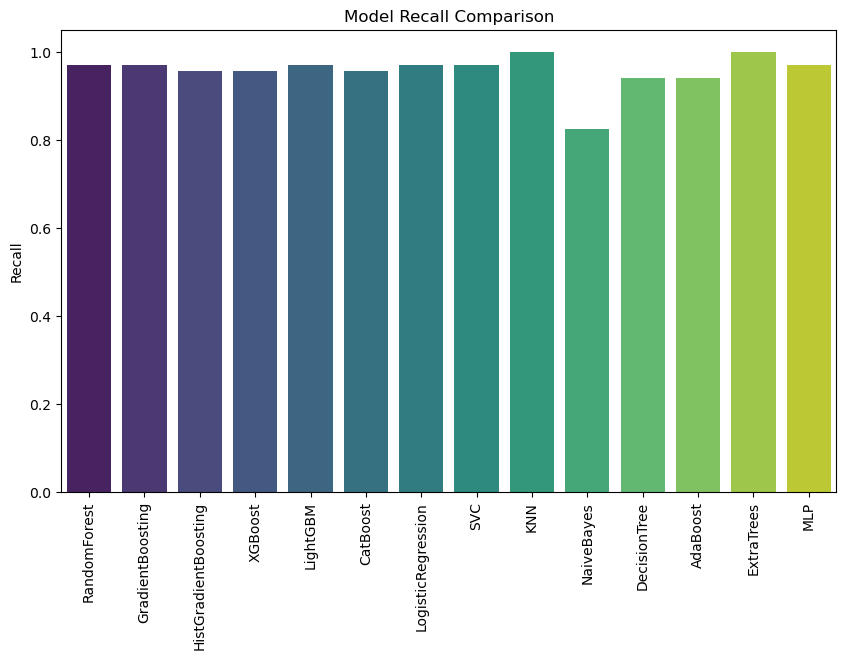

C:\Users\DELL\AppData\Local\Temp\ipykernel_11820\834743592.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(models.keys()), y=f1_scores, palette='viridis')


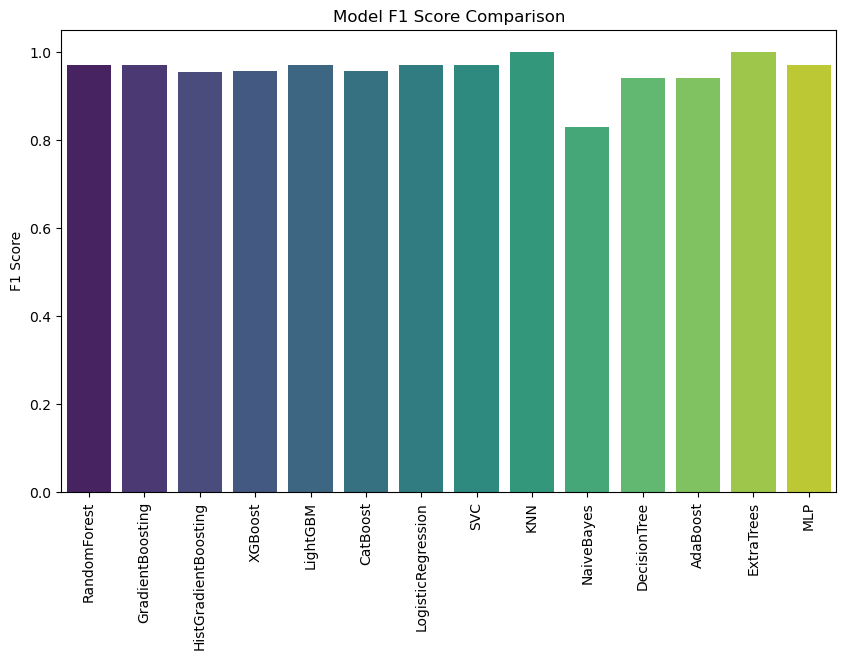

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load dataset
file_path = "C:/Users/DELL/Downloads/mini project penguins/cleaned_penguins_size_processed.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['species', 'island', 'sex']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['species'])
y = df['species']

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
models = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),  # Removed use_label_encoder=False
    "LightGBM": LGBMClassifier(min_child_samples=10, min_split_gain=0.01, max_depth=10, verbose=-1),  # Adjusted for better splits
    "CatBoost": CatBoostClassifier(verbose=0),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=1000)
}

# Metrics storage
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store metrics for plotting
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))
    
    # Print model performance
    print(f"{name} - Accuracy: {accuracy * 100:.2f}%, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")

    # Confusion Matrix Plot for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrices[-1], annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['species'].classes_, yticklabels=label_encoders['species'].classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plotting the metrics

# Accuracy Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=accuracy_scores, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)
plt.show()

# Precision Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=precision_scores, palette='viridis')
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.show()

# Recall Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=recall_scores, palette='viridis')
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.show()

# F1 Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=f1_scores, palette='viridis')
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xticks(rotation=90)
plt.show()
